In [ ]:
import pandas as pd

In [3]:
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

train_data.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [4]:
test_data.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal


In [5]:
metadata = pd.DataFrame(train_data.dtypes, columns = ['TYPE'])
metadata['N_CAT'] = 0
for var in metadata.index:
    metadata.loc[var,'N_CAT'] = len(train_data.groupby([var]).size())
metadata

,TYPE,N_CAT
Id,int64,1460
MSSubClass,int64,15
MSZoning,object,5
LotFrontage,float64,110
LotArea,int64,1073
...,...,...
MoSold,int64,12
YrSold,int64,5
SaleType,object,9
SaleCondition,object,6


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

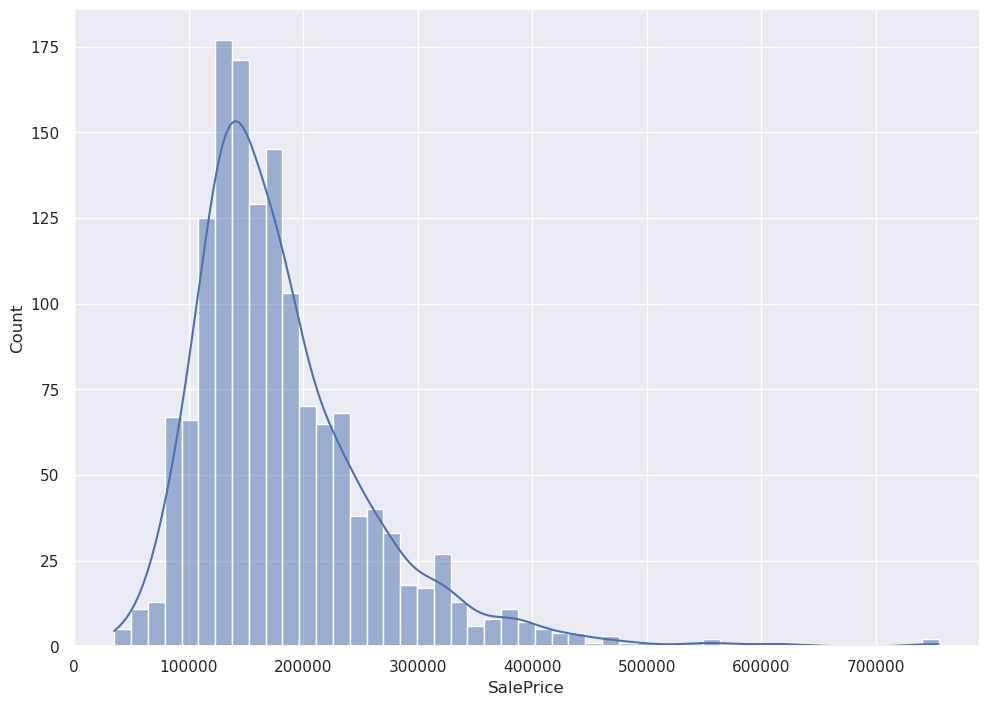

In [33]:
sns.histplot(train_data['SalePrice'], kde=True, color="b")

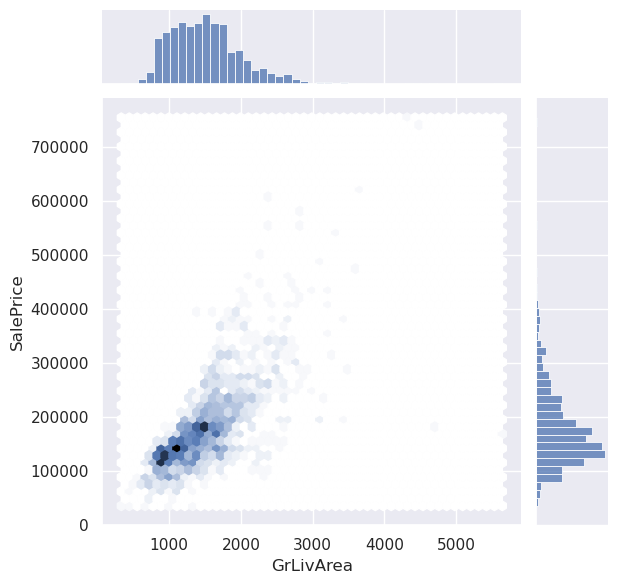

In [34]:
sns.jointplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], kind="hex", color="b")

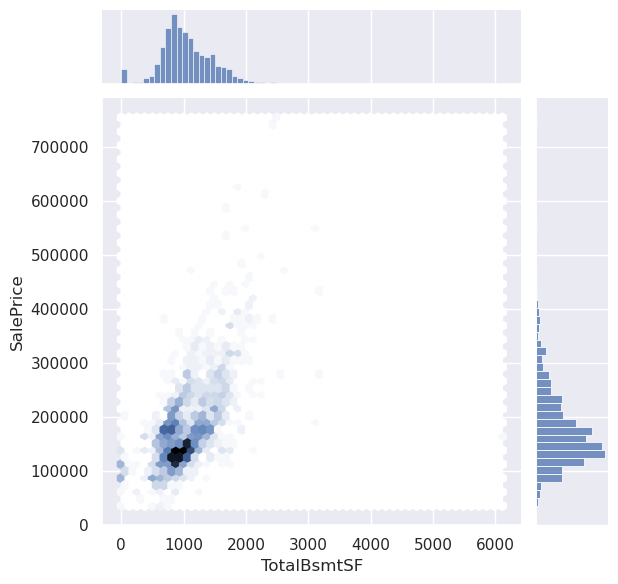

In [35]:
sns.jointplot(x=train_data['TotalBsmtSF'], y=train_data['SalePrice'], kind="hex", color="b")

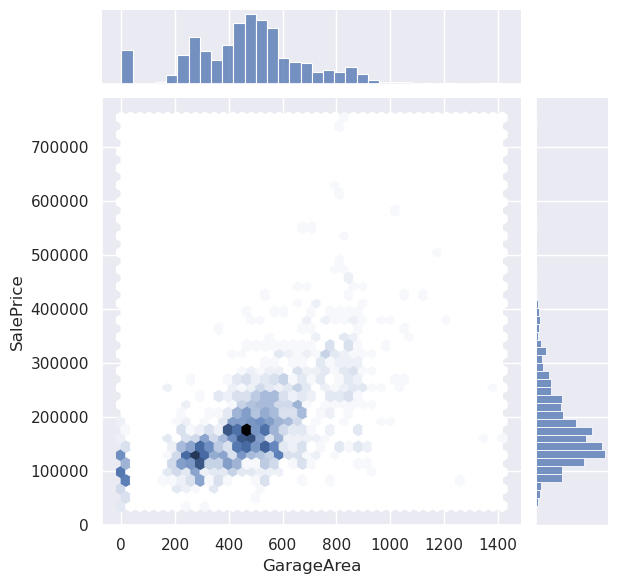

In [36]:
sns.jointplot(x=train_data['GarageArea'], y=train_data['SalePrice'], kind="hex", color="b")

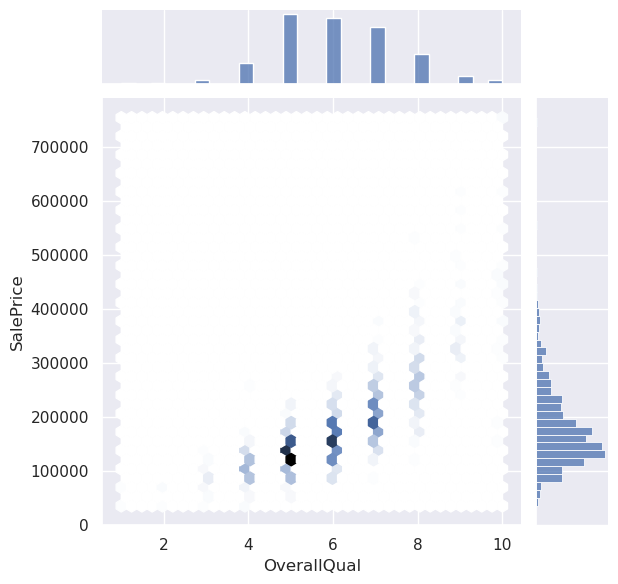

In [37]:
sns.jointplot(x=train_data['OverallQual'], y=train_data['SalePrice'], kind="hex", color="b")

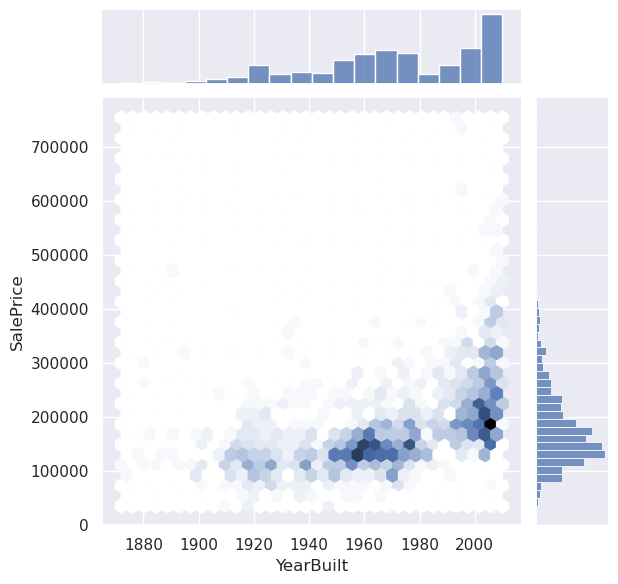

In [38]:
sns.jointplot(x=train_data['YearBuilt'], y=train_data['SalePrice'], kind="hex", color="b")

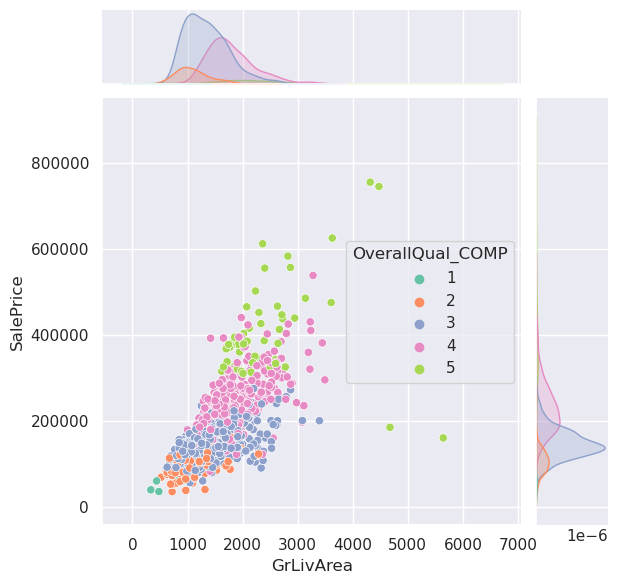

In [44]:
train_data['OverallQual_COMP'] = pd.cut(train_data['OverallQual'], 5, labels = [1,2,3,4,5])

sns.jointplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], hue=train_data['OverallQual_COMP'], palette="Set2")

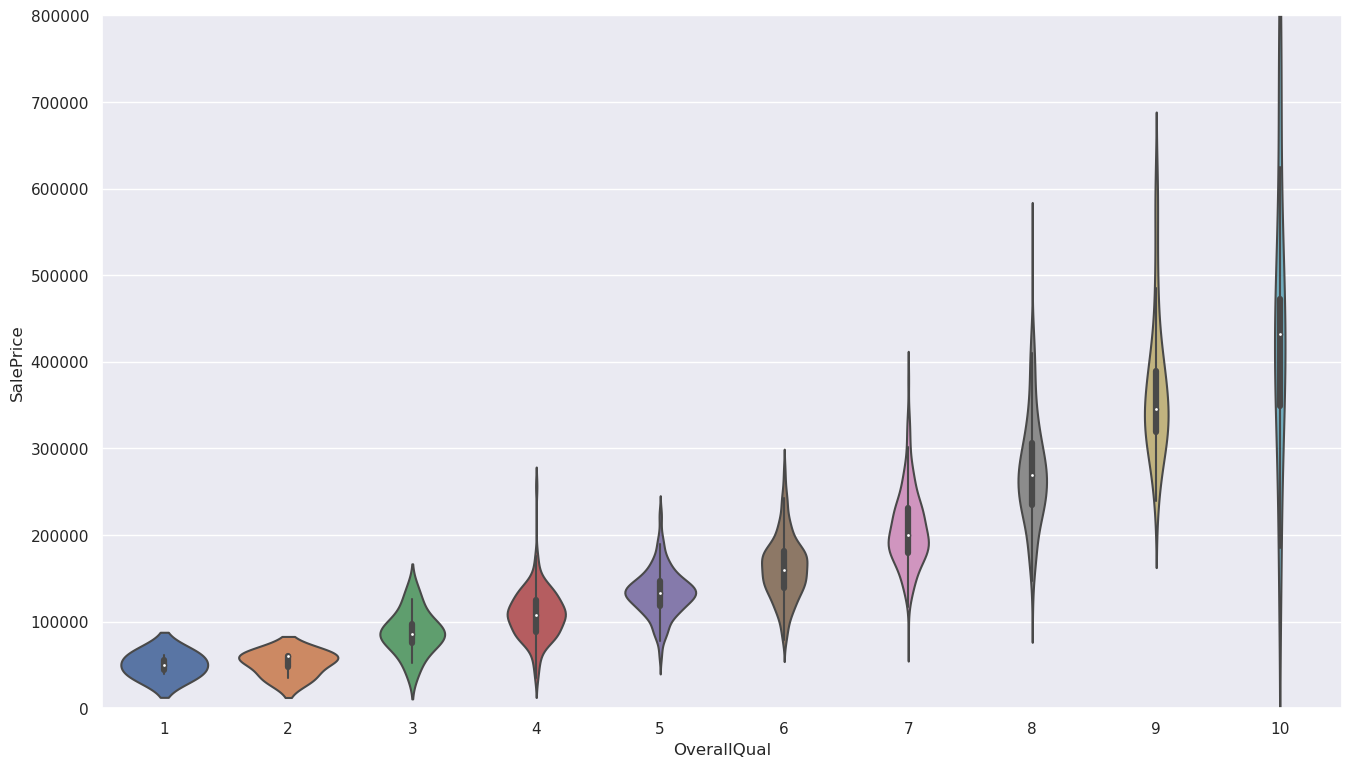

In [46]:
# violin plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 9))
fig = sns.violinplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

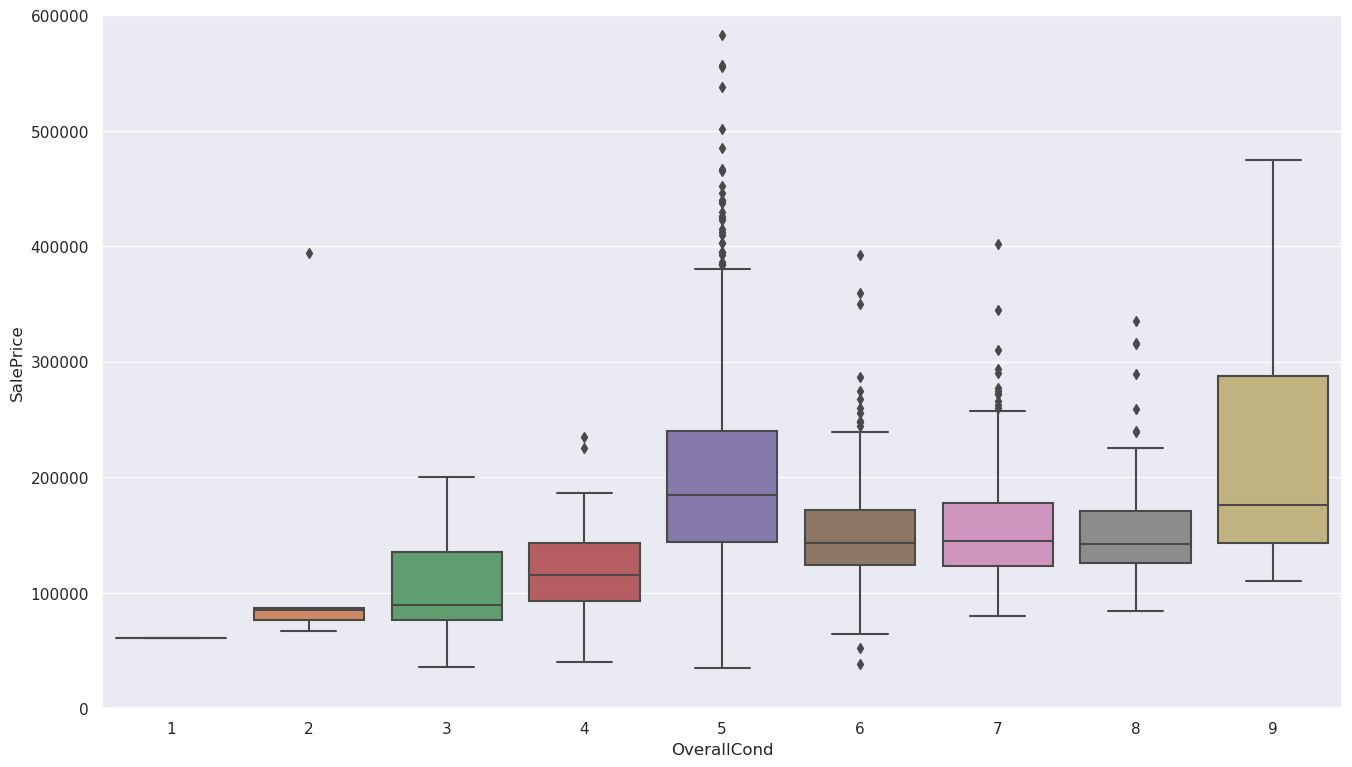

In [48]:
# Boxplot OverallCond/SalePrice
var = 'OverallCond'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 9))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=600000);

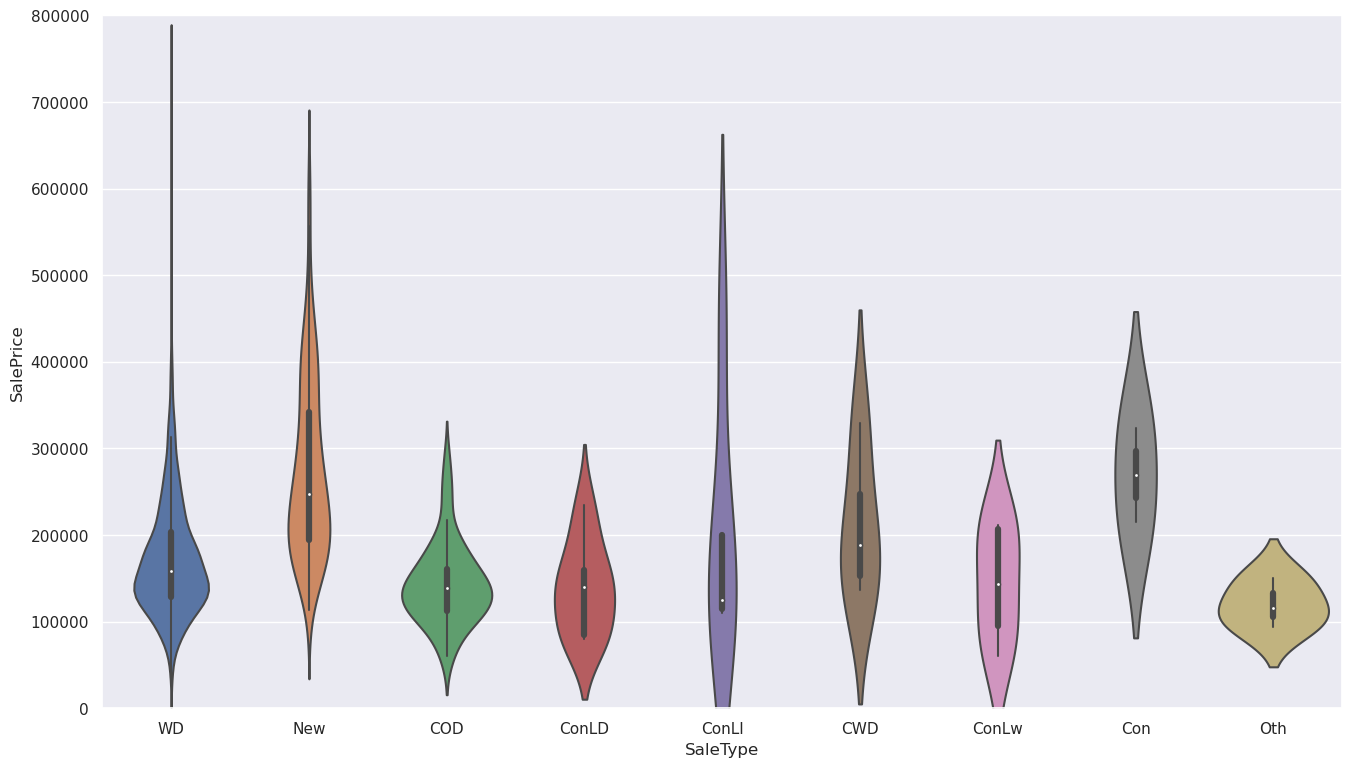

In [49]:
var = 'SaleType'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 9))
fig = sns.violinplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

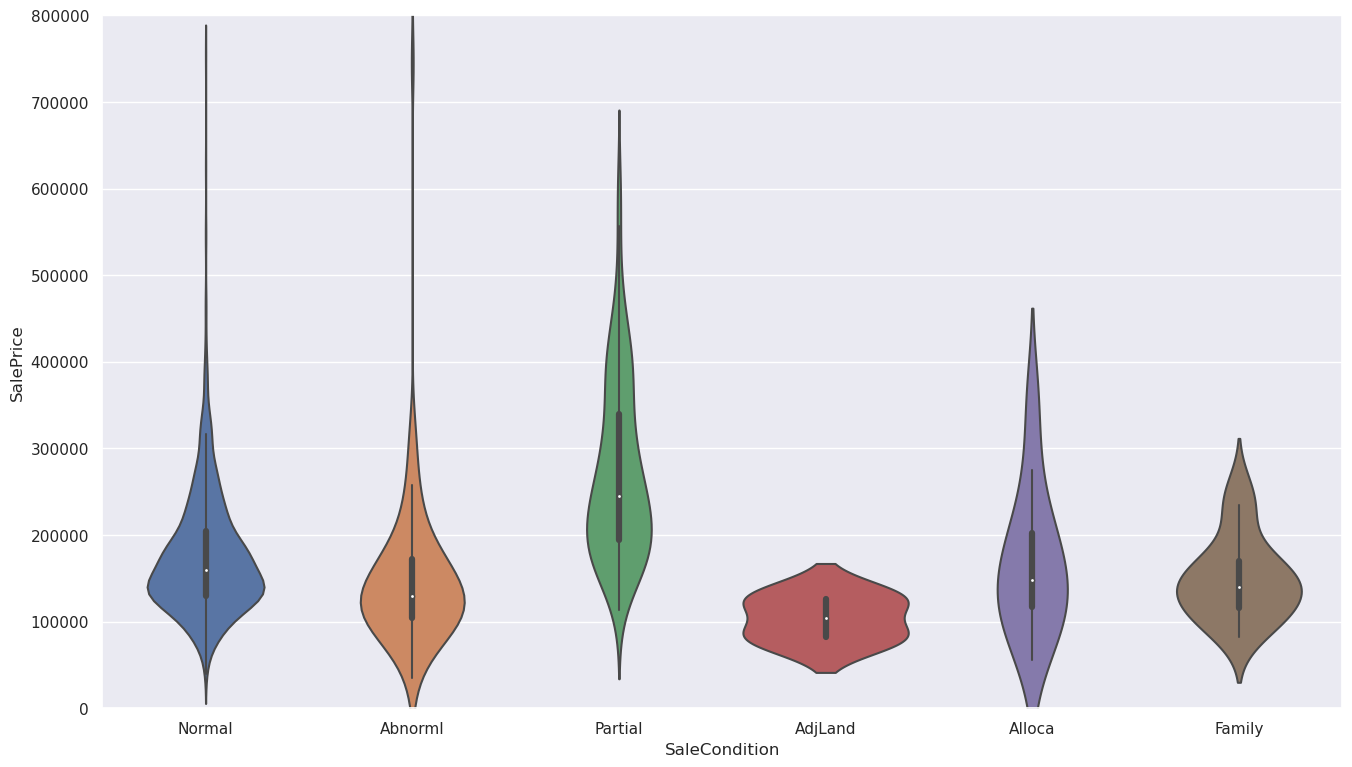

In [50]:
var = 'SaleCondition'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 9))
fig = sns.violinplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

/tmp/ipykernel_14175/2560735109.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice'], fit=stats.norm)
/tmp/ipykernel_14175/2560735109.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice'], fit=stats.chi2)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

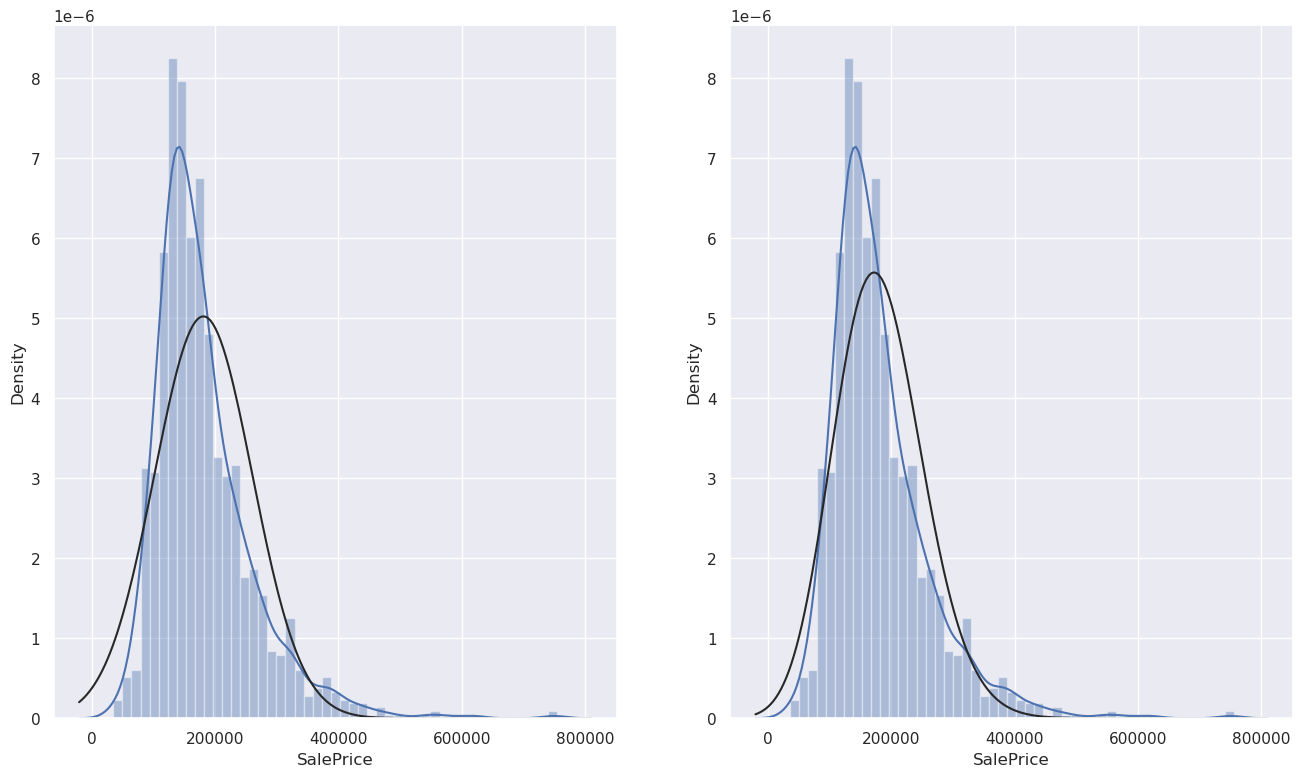

In [62]:
import scipy.stats as stats

plt.figure(figsize=(16, 9))
plt.subplot(1,2,1)
sns.distplot(train_data['SalePrice'], fit=stats.norm)
plt.subplot(1,2,2)
sns.distplot(train_data['SalePrice'], fit=stats.chi2)

((array([35.87546672, 36.05365997, 36.15288707, ..., 40.26021511,
         40.36316026, 40.54848929]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (105046.07535545179, -3830820.496485359, 0.9333781196812926))

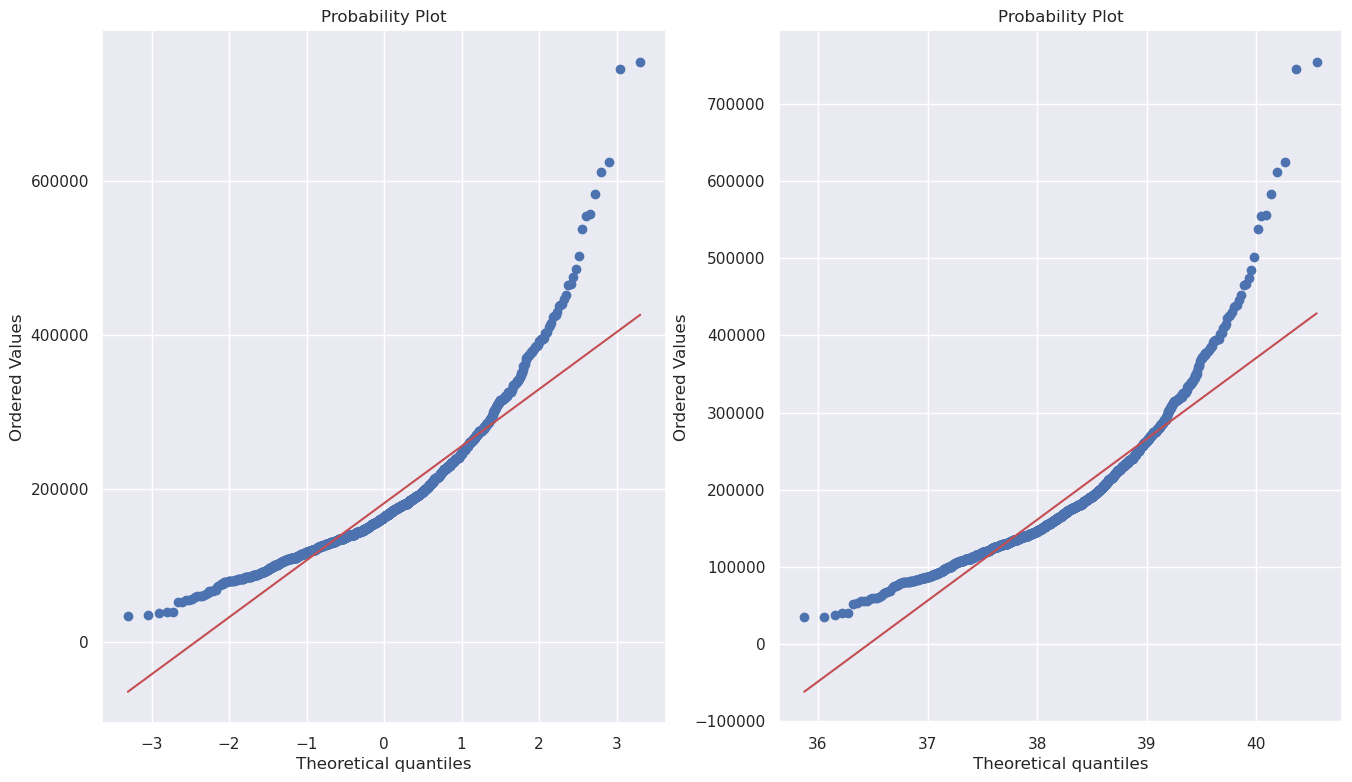

In [64]:
import numpy as np

plt.figure(figsize=(16, 9))
plt.subplot(1,2,1)
stats.probplot(train_data['SalePrice'], plot=plt, dist='norm')
plt.subplot(1,2,2)
stats.probplot(train_data['SalePrice'], plot=plt, dist=stats.chi(df=(len(train_data['SalePrice'])-1)))